In [54]:
import numpy as np 
import matplotlib.pyplot as plt
import sys 


In [17]:
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = np.array([
    [0],
    [0],
    [1],
    [1],
    [2],
    [2],
    [3],
    [3]
])

In [18]:
X

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [19]:
y

array([[0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [3],
       [3]])

In [20]:
num_i_units = 3 # Number of Input units
num_h_units = 2 # Number of Hidden units
num_o_units = 1 # Number of Output units

Neural Network Parameters
These are the parameters required directly by the NN. Comments should describe the variables.


In [21]:
# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 5000

# Number of training examples
m = 8

In [32]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
W3 = np.random.normal(2, 3, (num_o_units, num_h_units))

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [33]:
W1

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]])

In [34]:
W2

array([[ 1.74481176, -0.7612069 ]])

In [36]:
W3

array([[2.95711729, 1.25188887]])

In [37]:
B1

array([[0.02738759],
       [0.67046751]])

In [38]:
B2

array([[0.4173048]])

In [39]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

In [40]:
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [41]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2
dW3 = 0

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

In [55]:
def train(_W1, _W2, _W3, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0
        dW3 = 0
        
        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2
            
            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)
        _W3 = _W3 - learning_rate * (dW3 / m) + ( (reg_param / m) * _W3)
        
        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2)) +
                np.sum(np.power(_W3, 2))
            )
        )
    return (_W1, _W2, _W3, _B1, _B2) 

In [57]:
W1, W2, W3, B1, B2 = train(W1, W2, W3, B1, B2)

Iteration: 5000 and 8

In [58]:
W1

array([[ 9.25029446,  2.34270615, -0.49054275],
       [ 6.70642527,  2.94297196, -0.89652148]])

In [59]:
W2

array([[36.56917948, 21.36806336]])

In [60]:
W3

array([[2.95711729, 1.25188887]])

In [61]:
B1

array([[-4.0692739],
       [-2.5752101]])

In [62]:
B2

array([[25.67989335]])

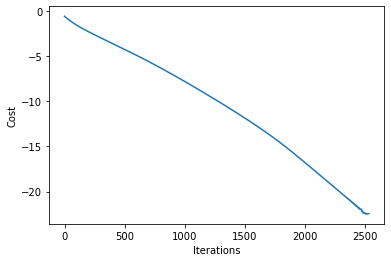

In [63]:
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()